<a href="https://colab.research.google.com/github/VidyaPedapothu/cs480student/blob/main/CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

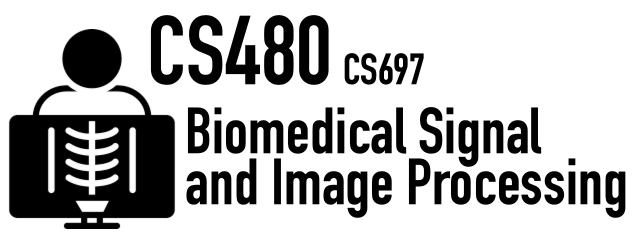
#Assignment 5

In [52]:
# In this assignment, we will visualize and explore a CT scan!

In [53]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [55]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [56]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [57]:
# TODO: YOUR_ANSWER
# 220 slices

In [58]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [59]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

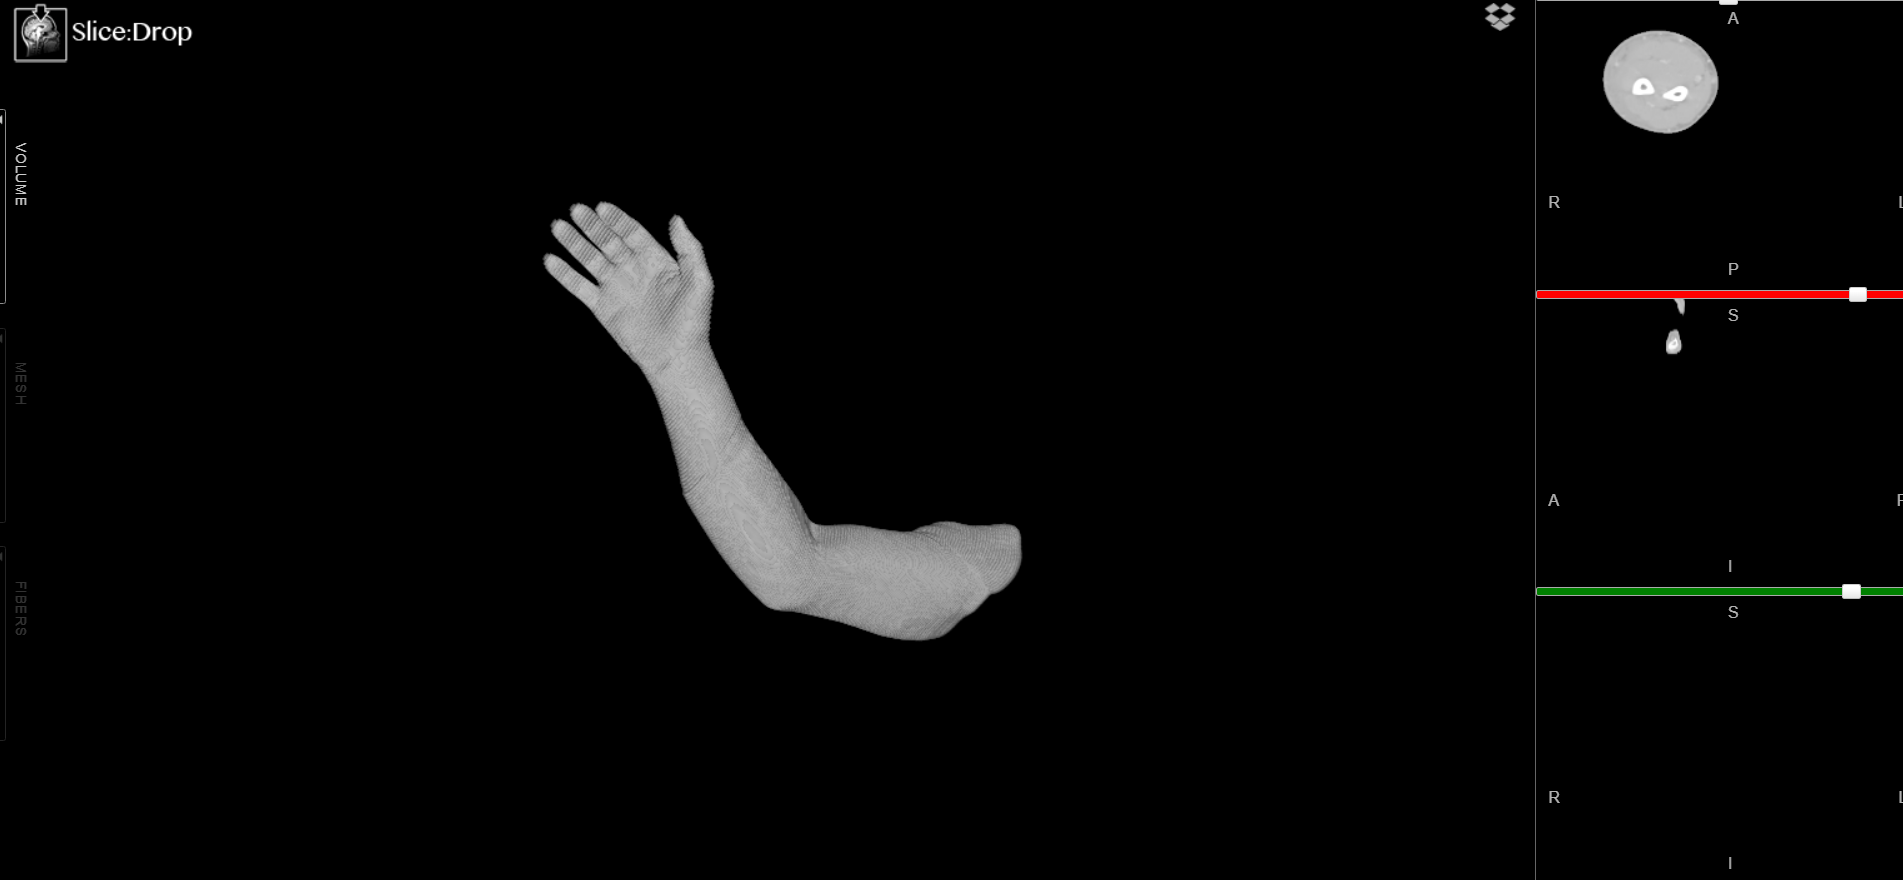

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [65]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [62]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [64]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [69]:
from pydicom import dcmread
import pydicom as pydicom

In [94]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
from os import listdir
from os.path import join
img_name = 'IM-0001-'
img_lis = []
for val in range(1,221):
  off_set = 4 - len(str(val))
  index = '0'*off_set + str(val) + '.dcm'
  img_lis.append(img_name+index)
val = pydicom.dcmread('./ct/'+img_lis[0])
print(val.pixel_array)
img3d = np.zeros((val.Rows,val.Columns,220))
slices=listdir("ct")

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [78]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.
for i, s in enumerate(img_lis):
    dcm_read = pydicom.dcmread('./ct/'+s)
    img2d = dcm_read.pixel_array
    img3d[:, :, i] = img2d


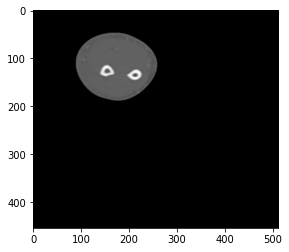

In [76]:
# TODO: YOUR CODE FOR AXIAL
imshow(img3d[:,:,100], cmap='gray')


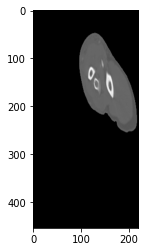

In [75]:
# TODO: YOUR CODE FOR SAGITTAL
imshow(img3d[:,100,:], cmap='gray')

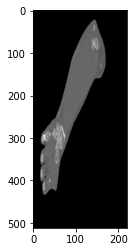

In [74]:
# TODO: YOUR CODE FOR CORONAL
imshow(img3d[100,:,:], cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [80]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [81]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

Window center:  30
Window width:  410
Rescale intercept:  -1024


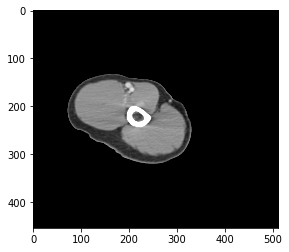

In [102]:
# TODO: YOUR CODE
a = lstSlices[200].WindowCenter
b = lstSlices[200].WindowWidth
c = lstSlices[200].RescaleIntercept
print("Window center: ",a)
print("Window width: ",b)
print("Rescale intercept: ",c)

vmin = a - window_width/2
vmax = a + window_width/2
plt.imshow(lstSlices[200].pixel_array + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()




In [108]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

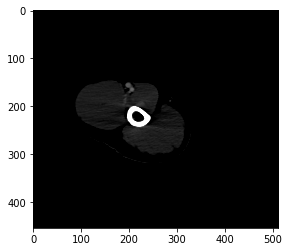

In [107]:
vmin = a - window_width/20
vmax = a + window_width+300/20
plt.imshow(lstSlices[200].pixel_array + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [109]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
#YES, the vmax has made the bones more visable compared to the previous image

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

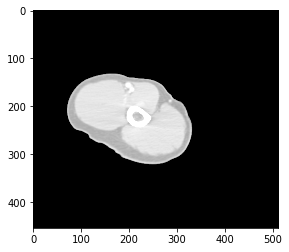

In [123]:

vmin = (a-150 - window_width-300/2)
vmax = (a-150 + window_width-300/2)
plt.imshow(lstSlices[200].pixel_array + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

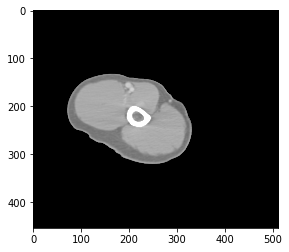

In [117]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

vmin = (a-100 - window_width-200/20)
vmax = (a-100 + window_width-200/20)
plt.imshow(lstSlices[200].pixel_array + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

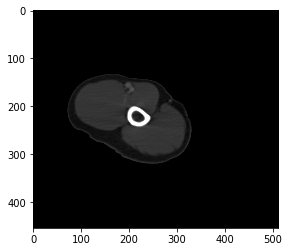

In [119]:
# TODO: YOUR CODE TO SEGMENT BONES

vmin = (a) - window_width/2
vmax = a + window_width+1000/2
plt.imshow(lstSlices[200].pixel_array + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
YES

COLLAB: Krishna Teja

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""